# Visualize Pyramid Images

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data import DataLoader
import torch.nn as nn
import sys
import matplotlib.pyplot as plt
import numpy as np
from pytorch_metric_learning import losses

import utils.statnetencoder as sne
import imp

#!wget https://raw.githubusercontent.com/pytorch/pytorch/master/torch/utils/collect_env.py

import sys
sys.path.append('../pmetamer')  # Hack to allow importing from pmetamer sibling package/directory
import spyramid as sp


#use GPU 2
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

#hyperparams
num_epochs = 100
batch_size = 5
crop_size = 128
num_stats = 50
optimizer_type='adam'
#optimizer_type='sgd'
learning_rate = 0.001
num_crops = 5

sparsity_penalty = 0.01

#dataset location
dtd_folder = '~/datasets/dtd'

In [3]:
loading_transforms = torchvision.transforms.Compose([#transforms.CenterCrop(size=300),
                                                    #transforms.RandomRotation(degrees=180),
                                                    transforms.Grayscale(),
                                                    #transforms.TenCrop(size=crop_size),
                                                    #transforms.RandomRotation(degrees=[0,90,180,270]),
                                                    transforms.RandomVerticalFlip(p=0.5),
                                                    transforms.RandomHorizontalFlip(p=0.5),
                                                    transforms.FiveCrop(size=crop_size),
                                                    #transforms.functional.vflip(),
                                                    #transforms.functional.hflip(),
                                                    transforms.Lambda(lambda crops: torch.stack([transforms.PILToTensor()(crop) for crop in crops])),
                                                    transforms.ConvertImageDtype(torch.float32)])
                                                    #transforms.PILToTensor()])

#use training set for now
dtd_dataset = torchvision.datasets.DTD(root=dtd_folder, split='train', partition=1, 
                                       transform=loading_transforms, target_transform=None,
                                       download=False)

sampler = data.RandomSampler(dtd_dataset)

dtd_dataloader = DataLoader(dtd_dataset, 
                            sampler=sampler,
                            batch_size=batch_size, 
                            shuffle=False)
#dtd_labels = tf

tensor2pil_transform = transforms.ToPILImage()

tensor([3, 1, 4, 2, 3, 4, 2, 2, 3, 1, 2, 3, 0, 0, 4, 1, 4, 1, 3, 1, 0, 0, 0, 4,
        2])


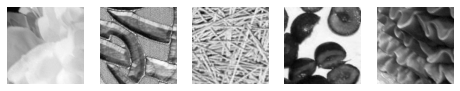

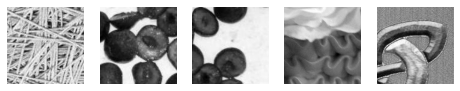

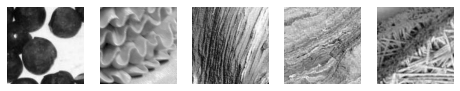

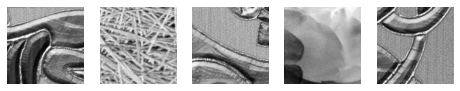

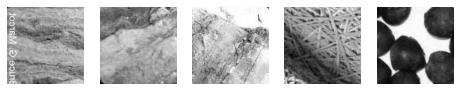

In [4]:
if(True):
    for n, texture_batch in enumerate(dtd_dataloader):
        #grab texture batch and generate matching labels
        output = texture_batch[0].to(device)
        output = torch.flatten(output, start_dim=0, end_dim=1)
        texture_labels = torch.repeat_interleave(torch.arange(batch_size),num_crops)
        #apply random permutation
        perm = torch.randperm(batch_size * num_crops)
        output = output[perm]
        texture_labels = texture_labels[perm]
        print(texture_labels)
        #loop through batch and plot images
        for j in range(batch_size):
            plt.figure(figsize=(8,4))
            for i in range(num_crops):
                plt.subplot(2,5,i+1)
                plt.imshow(tensor2pil_transform(output[i+j*num_crops,:,:,:]),cmap='gray')
                plt.axis('off')
            plt.show()
        if(n==0):
            break;


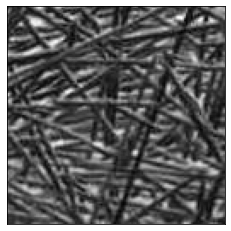

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


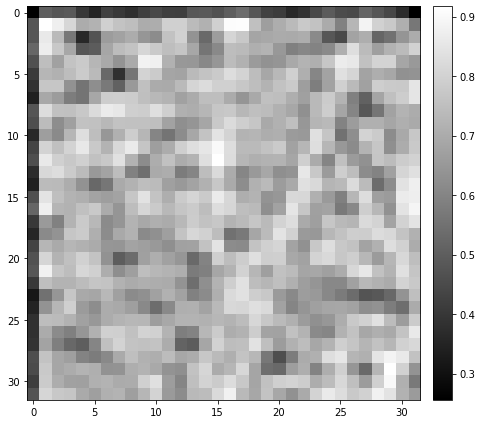

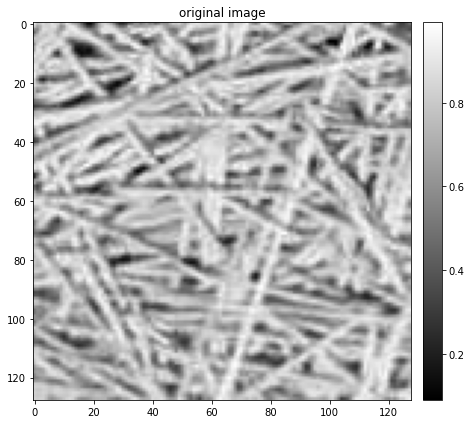

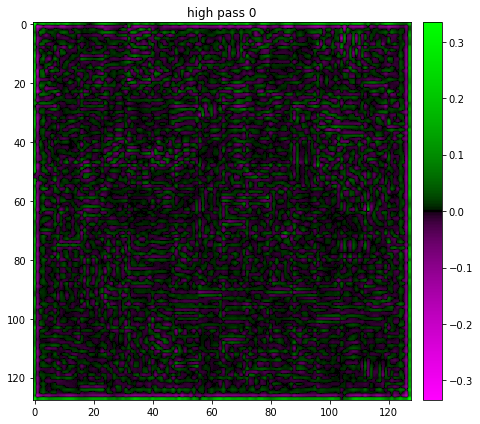

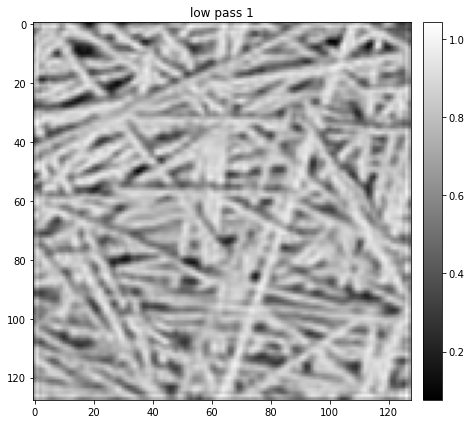

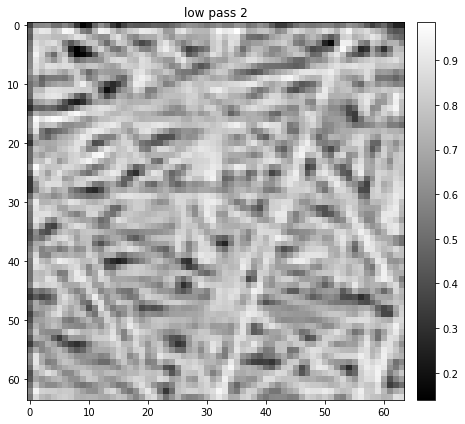

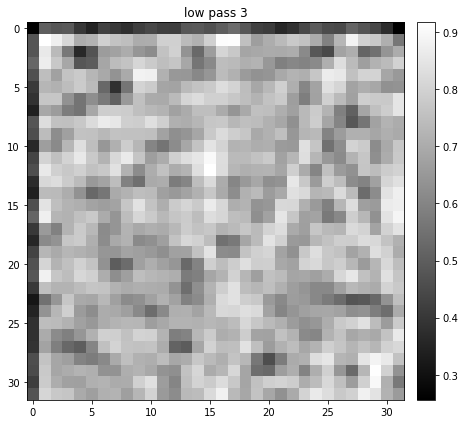

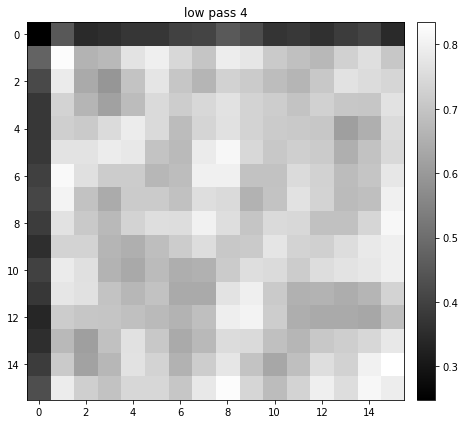

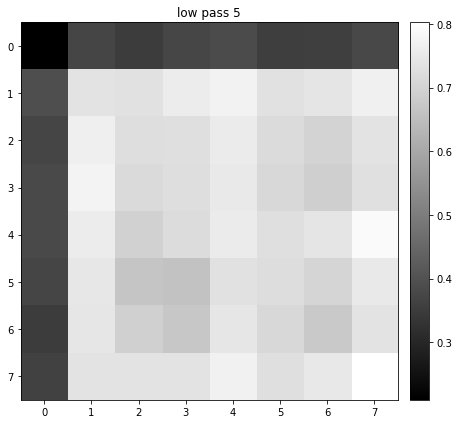

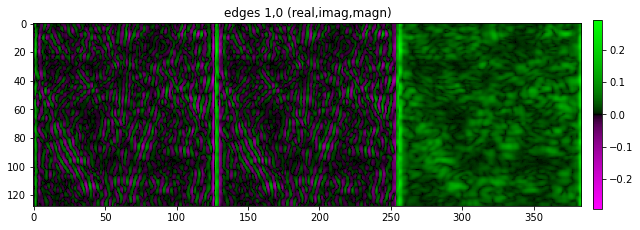

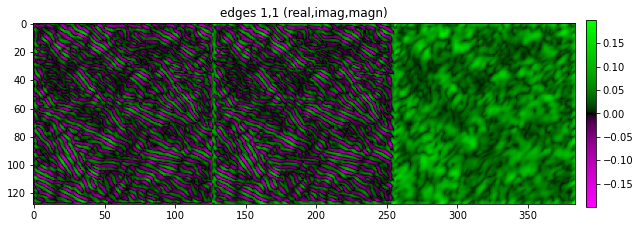

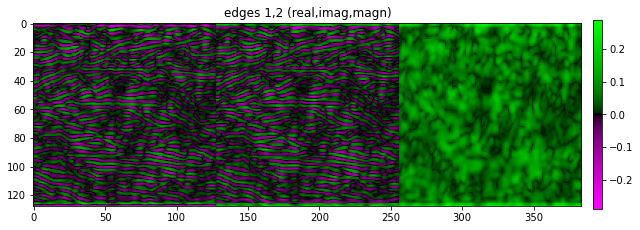

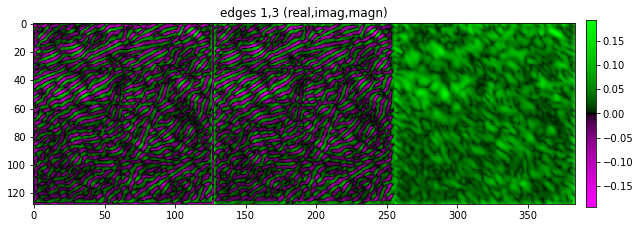

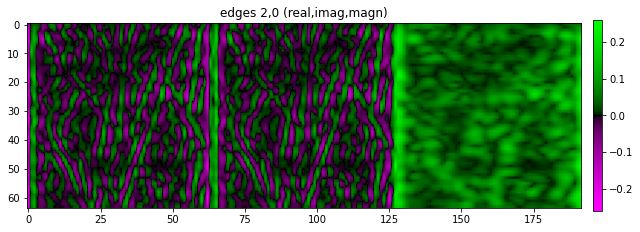

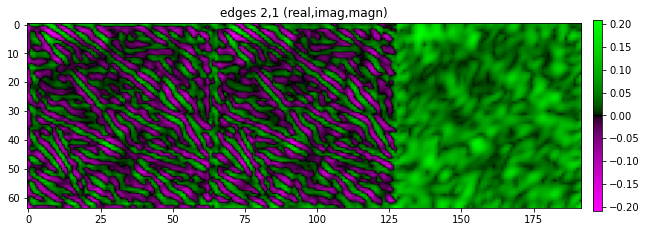

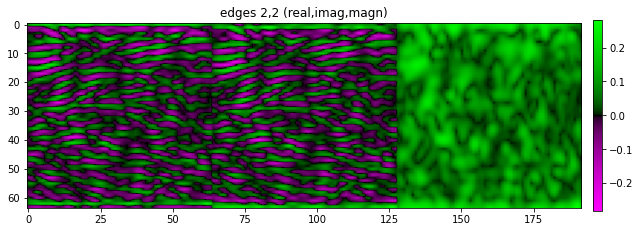

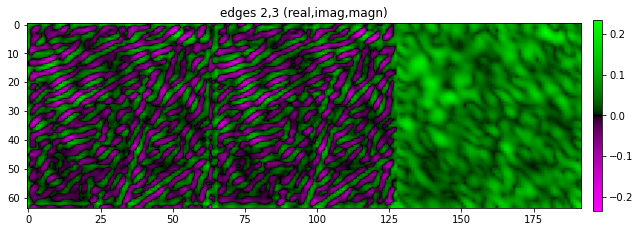

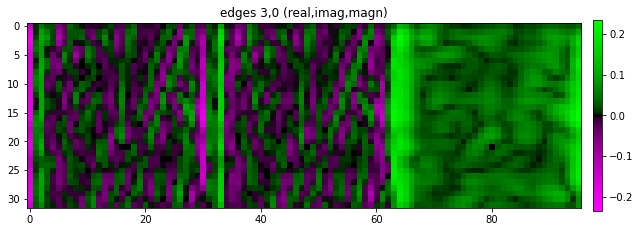

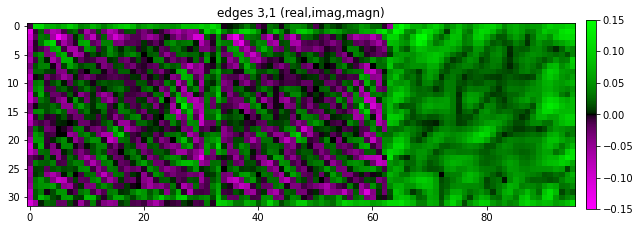

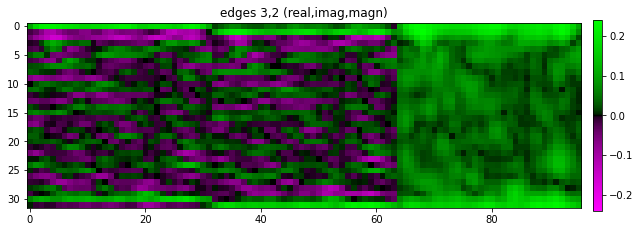

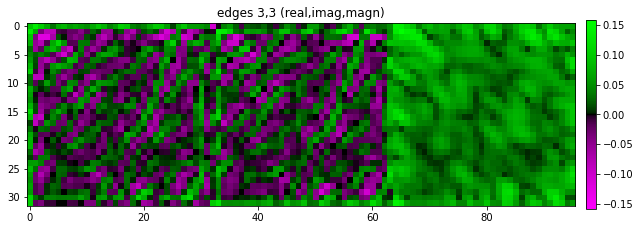

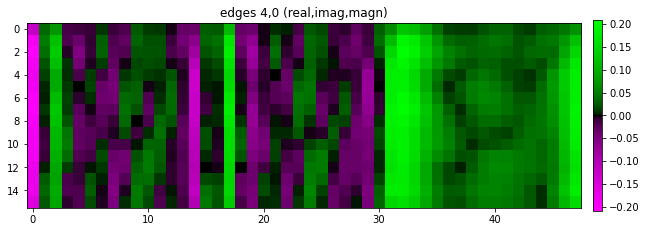

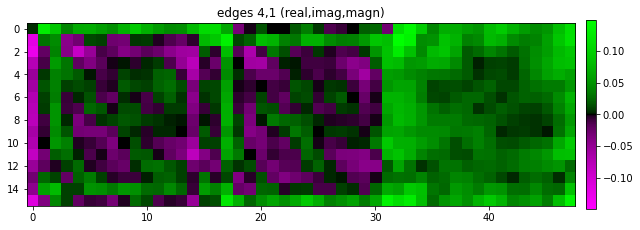

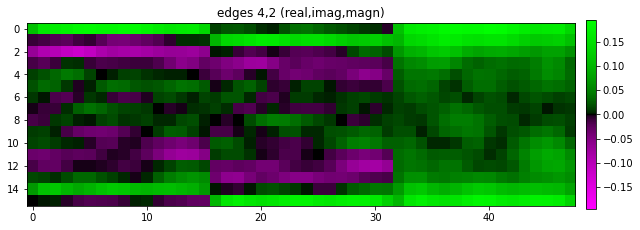

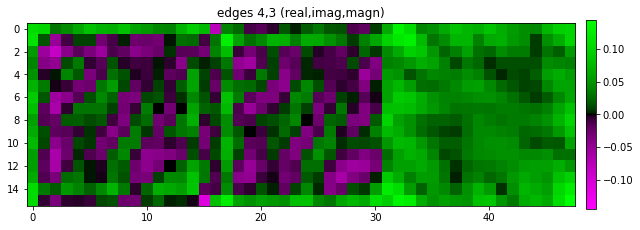

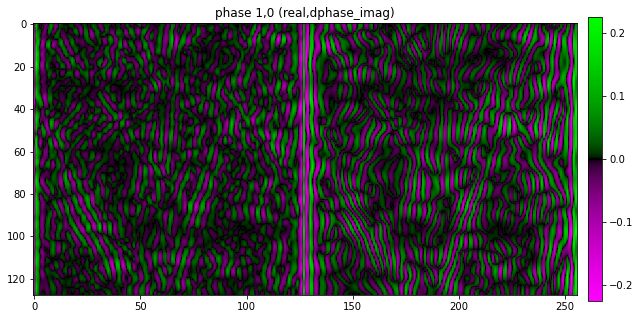

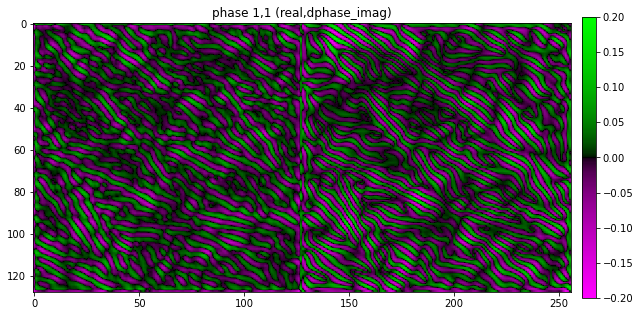

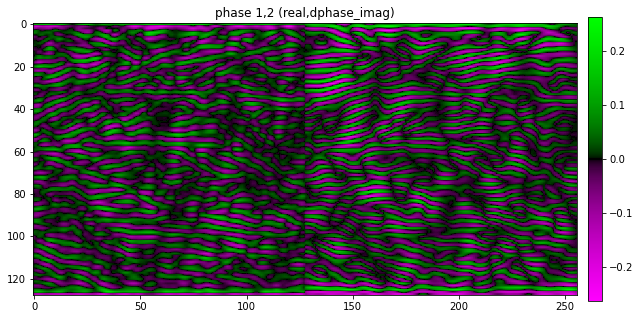

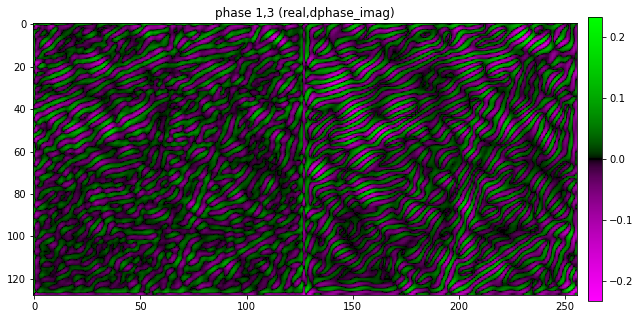

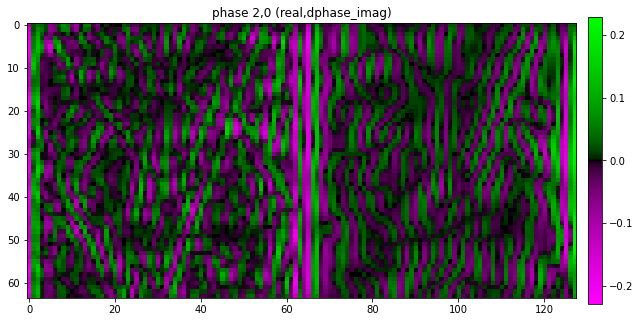

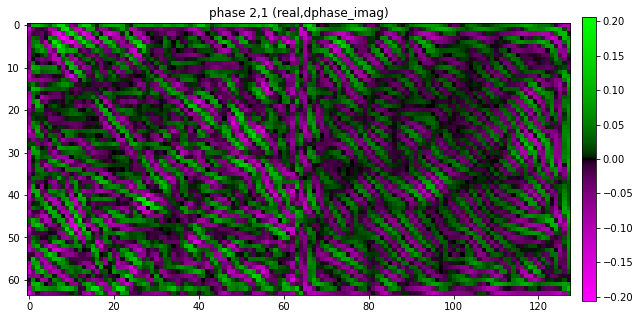

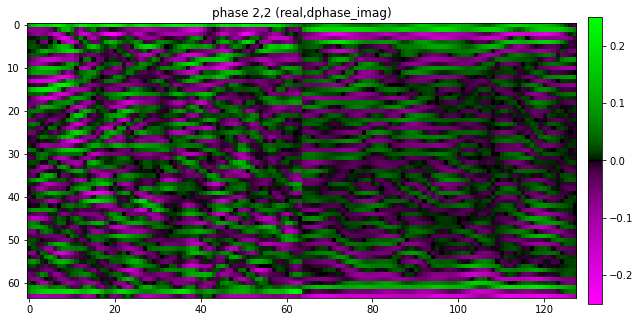

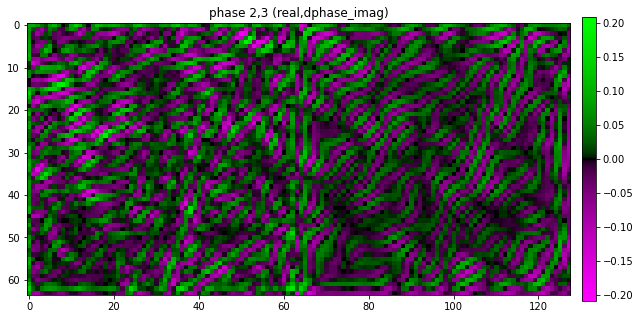

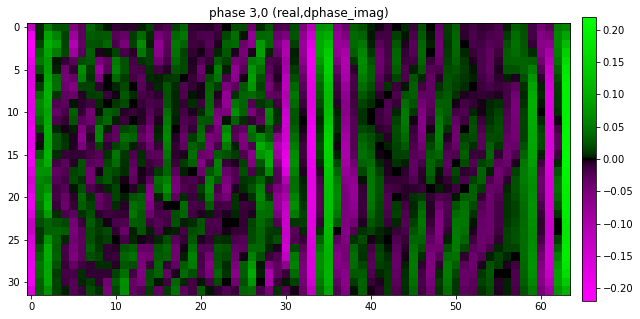

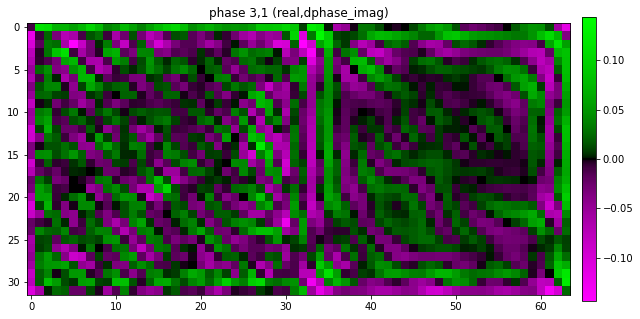

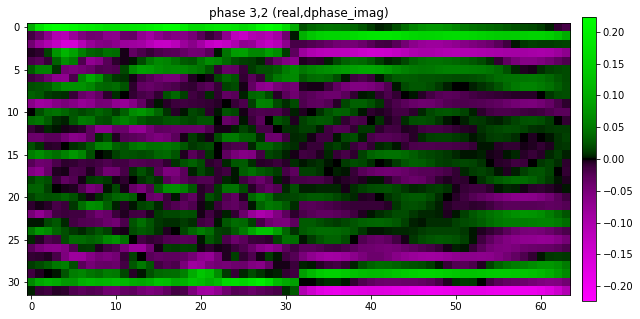

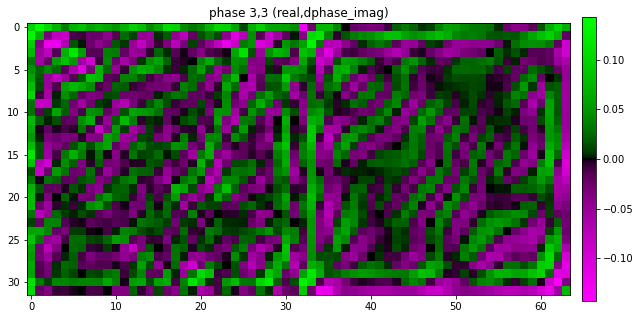

In [5]:
from image_utils import load_image_gray, plot_image, plot_images, plot_image_channels, plot_image_stack

#output.shape
img = output[2,0,:,:].cpu()
plt.imshow(img,cmap='gray_r')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

levels=4
#hblevels=1
orientations = 4

params = sp.SPyramidParams(edge_levels=4)

builder = sp.SPyramidFourierBuilder(img,params,downsample=True)
spyr = builder.build_spyramid(img)
plot_images(torch.unbind(spyr.low_pass_image(3)))
plt.show()
ori = 0

spyr.plot_component_images()  
